# 비정상 절차서 21-02 : <font color=blue>PZR 압력 채널 BB-PT444 고장 ‘저’

1. 경보 및 증상
2. 자동 동작사항
3. 긴급 조치사항
4. 후속 조치사항

## <font color=blue>1.0 데이터 처리

In [34]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab21_02_152.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## <font color=blue>2.0 경보 및 증상

### <font color=blue>2.1 PZR ‘저’ 압력 지시(BB-PI444)<font color=green>- 만족

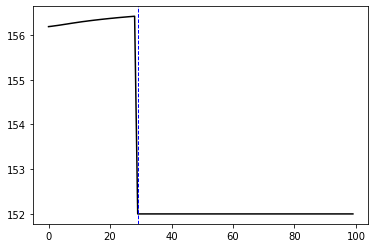

In [43]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58'].iloc[:100], color='k') # -> 압력 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [44]:
PRZ_pre = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST58'][i] < 157.0354 :
            PRZ_pre.append(i+1)
if len(PRZ_pre) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 압력 "고" 지시 만족 시간 : {PRZ_pre[0]}초')

가압기 압력 "고" 지시 만족 시간 : 31초


### <font color=blue>2.2 "PZR PRESS LO/BACKUP HEATERS ON" 경보 발생(155.4㎏/㎠) 및 PZR 보조전열기 모두 켜짐 지시<font color=green>- 만족

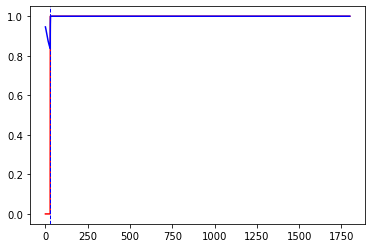

In [45]:
# QPRZB : 보조전열기 전원
# QPRZH : 비례전열기 전원
plt.plot(db['QPRZB']*0.000001, color='r') # -> 보조전열기 전원 확인
plt.plot(db['QPRZH'], color='b') # -> 비례전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [46]:
heater = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CQPRZB'][i] and db['KBHON'][i] == 1 :
            heater.append(i+1)
if len(heater) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 압력 "고" 지시 만족 시간 : {heater[0]}초')

가압기 압력 "고" 지시 만족 시간 : 31초


### <font color=blue>2.3 "PZR PRESS HIGH"(BB-PT444B, 445) 경보 발생(162.4㎏/㎠) 및 PZR ‘고’ 압력 지시(BB-PI445, 455, 456, 457)<font color=green>- 만족

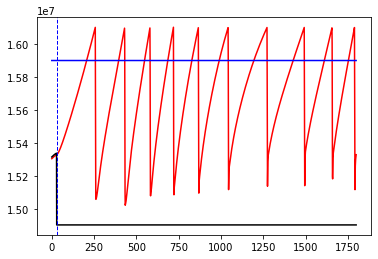

In [47]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
plt.plot(db['CPPRZH'], color='b') #저 압력 기준치
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [48]:
PRZ_high_pre = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] > db['CPPRZH'][i]:
            PRZ_high_pre.append(i+1)
if len(PRZ_high_pre) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_high_pre[0]}초')

가압기 "저" 지시 만족 시간 : 208초


### <font color=blue>2.4 PZR PORV(BB-PV444B, 445A, 445B) 열림 지시 및 경보 발생(164.2㎏/㎠)<font color=green>- 만족

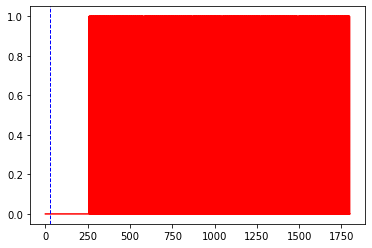

In [49]:
# KLAMPO309 = PORV OPENING 경보 
plt.plot(db['KLAMPO309'], color='r') #실제 압력
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [70]:
PORV_Val = []
for i in range(len(db)):
    if i > 29:
        if db['BPORV'][i] != 0:
            PORV_Val.append(i)
if len(PORV_Val) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'PORV OPEN 경보  : {PORV_Val[0]}초')

PORV OPEN 경보  : 258초


### <font color=blue>2.5 실제 압력 감소로 PZR PORV(BB-PV444B, 445A, 445B) 닫힘<font color=green>- 만족

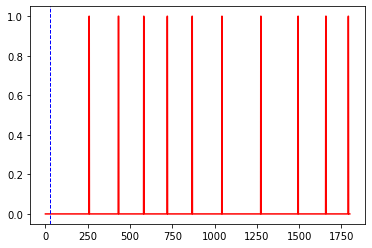

In [68]:
# BPORV = PORV Valve 포지션  
plt.plot(db['BPORV'], color='r') # PORV Valve 포지션  
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

Report - 이것을 어떻게 설명해야 할지 모르겠습니다...

## <font color=blue>3.0 자동 동작사항

### <font color=blue>3.1 PZR 전열기 모두 켜짐(155.8㎏/㎠)<font color=green>- 만족

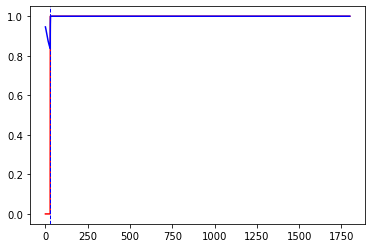

In [73]:
# QPRZB : 보조전열기 전원
# QPRZH : 비례전열기 전원
plt.plot(db['QPRZB']*0.000001, color='r') # -> 보조전열기 전원 확인
plt.plot(db['QPRZH'], color='b') # -> 비례전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [75]:
QPRZ_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i]*0.000001 == 1 and db['QPRZH'][i]  == 1 :
            QPRZ_onoff.append(i+1)
if len(QPRZ_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' PZR 모든 전열기 작동 만족 시간 : {QPRZ_onoff[0]}초')

 PZR 모든 전열기 작동 만족 시간 : 34초


### <font color=blue>3.2 PZR PORV(BB-PV444B, 445A, 445B) 열림(164.2㎏/㎠) 및 닫힘(162.8㎏/㎠) 반복<font color=green>- 만족

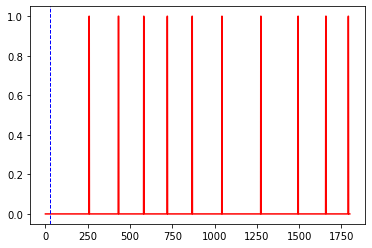

In [76]:
# BPORV = PORV Valve 포지션  
plt.plot(db['BPORV'], color='r') # PORV Valve 포지션  
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)